In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
tips = sns.load_dataset('tips')

In [4]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


c:\users\ugdk93\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


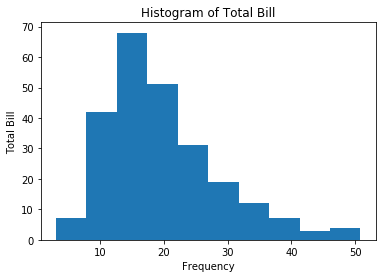

In [5]:
# histogram
fig = plt.figure()
axes1 = fig.add_subplot(1,1,1)
axes1.hist(tips['total_bill'], bins=10)
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('Frequency')
axes1.set_ylabel('Total Bill')
fig.show()

c:\users\ugdk93\venv\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  


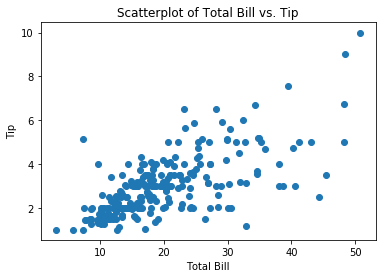

In [6]:
# scatter plot
scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatterplot of Total Bill vs. Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

c:\users\ugdk93\venv\lib\site-packages\ipykernel_launcher.py:10: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  # Remove the CWD from sys.path while we load stuff.


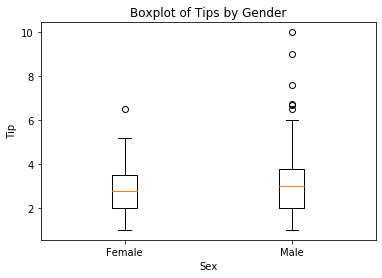

In [7]:
# box plot
boxplot = plt.figure()
axes1 = boxplot.add_subplot(1,1,1)
axes1.boxplot([tips[tips['sex'] == 'Female']['tip'],
              tips[tips['sex'] == 'Male']['tip']],
             labels=['Female', 'Male'])
axes1.set_xlabel('Sex')
axes1.set_ylabel('Tip')
axes1.set_title('Boxplot of Tips by Gender')
boxplot.show()

c:\users\ugdk93\venv\lib\site-packages\ipykernel_launcher.py:20: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


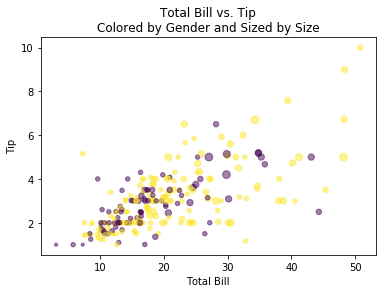

In [8]:
# Adding color and size to additional variables
def recode_gender(gender):
    if gender == 'Female':
        return 0
    else:
        return 1
    
tips['sex_color'] = tips['sex'].apply(recode_gender)

scatter_plot = plt.figure()
axes1 = scatter_plot.add_subplot(1,1,1)
axes1.scatter(x=tips['total_bill'], y=tips['tip'],
              s=tips['size']*10,
              c=tips['sex_color'],
              alpha=0.5)

axes1.set_title('Total Bill vs. Tip\nColored by Gender and Sized by Size')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
scatter_plot.show()

*************************
### Plotting with seaborn

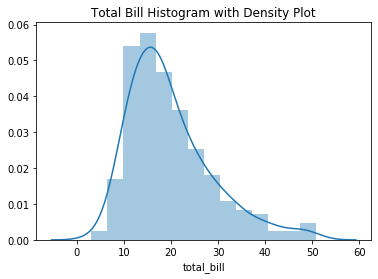

In [9]:
# histogram with seaborn
hist, ax = plt.subplots()
# default is to include a kde density plot. Set kde=False to remove.
# Conversely, set hist=False to have a density plot with no histogram.
ax = sns.distplot(tips['total_bill'])
ax.set_title('Total Bill Histogram with Density Plot')
plt.show()

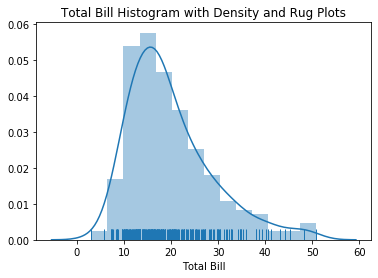

In [10]:
# the hat trick: kde, histogram and rug plot
hist_den_rug, ax = plt.subplots()
ax = sns.distplot(tips['total_bill'], rug=True)
ax.set_title('Total Bill Histogram with Density and Rug Plots')
ax.set_xlabel('Total Bill')
plt.show()

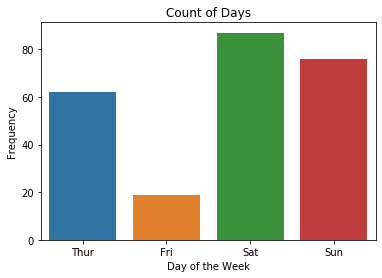

In [11]:
# count plot
count, ax = plt.subplots()
ax = sns.countplot('day', data=tips)
ax.set_title('Count of Days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

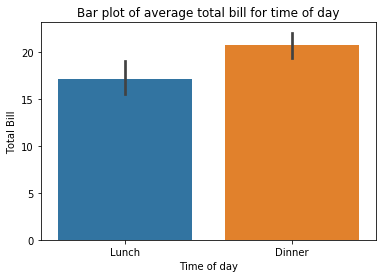

In [24]:
# bar plot
# By default will calculate a mean, but you can pass any function
# into the estimator parameter.
bar, ax = plt.subplots()
ax = sns.barplot(x='time', y='total_bill', data=tips)
ax.set_title('Bar plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

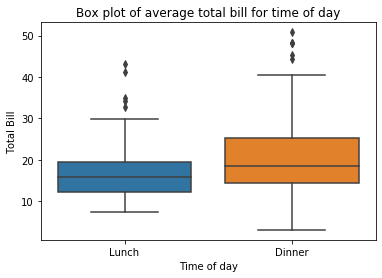

In [25]:
# Boxplot
box, ax = plt.subplots()
ax = sns.boxplot(x='time', y='total_bill', data=tips)
ax.set_title('Box plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

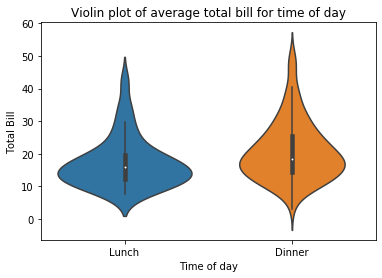

In [26]:
# violin plot - boxes are plotted as kernel density estimations (kde's)
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips)
ax.set_title('Violin plot of average total bill for time of day')
ax.set_xlabel('Time of day')
ax.set_ylabel('Total Bill')
plt.show()

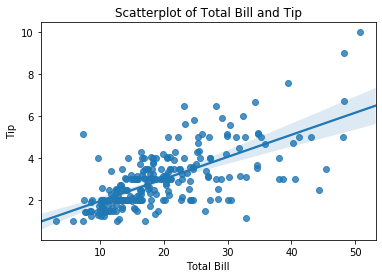

In [12]:
# seaborn scatter plot using regplot
scatter, ax = plt.subplots()
ax = sns.regplot(x='total_bill', y='tip', data=tips)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

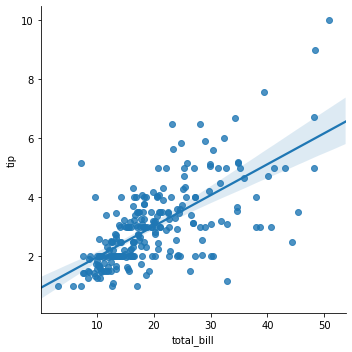

In [13]:
# Same as above; regplot creates axes, lmplot creates a figure.
sns.lmplot(x='total_bill', y='tip', data=tips)

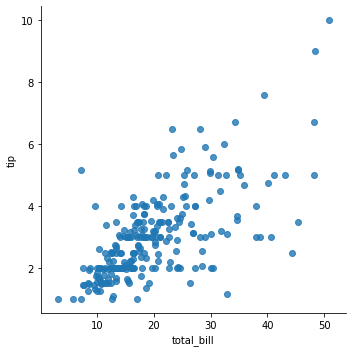

In [21]:
sns.lmplot(x='total_bill', y='tip', data=tips, fit_reg=False)

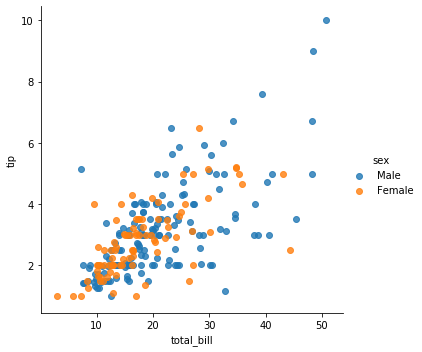

In [16]:
sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

In [17]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
total_bill    244 non-null float64
tip           244 non-null float64
sex           244 non-null category
smoker        244 non-null category
day           244 non-null category
time          244 non-null category
size          244 non-null int64
sex_color     244 non-null category
dtypes: category(5), float64(2), int64(1)
memory usage: 7.6 KB


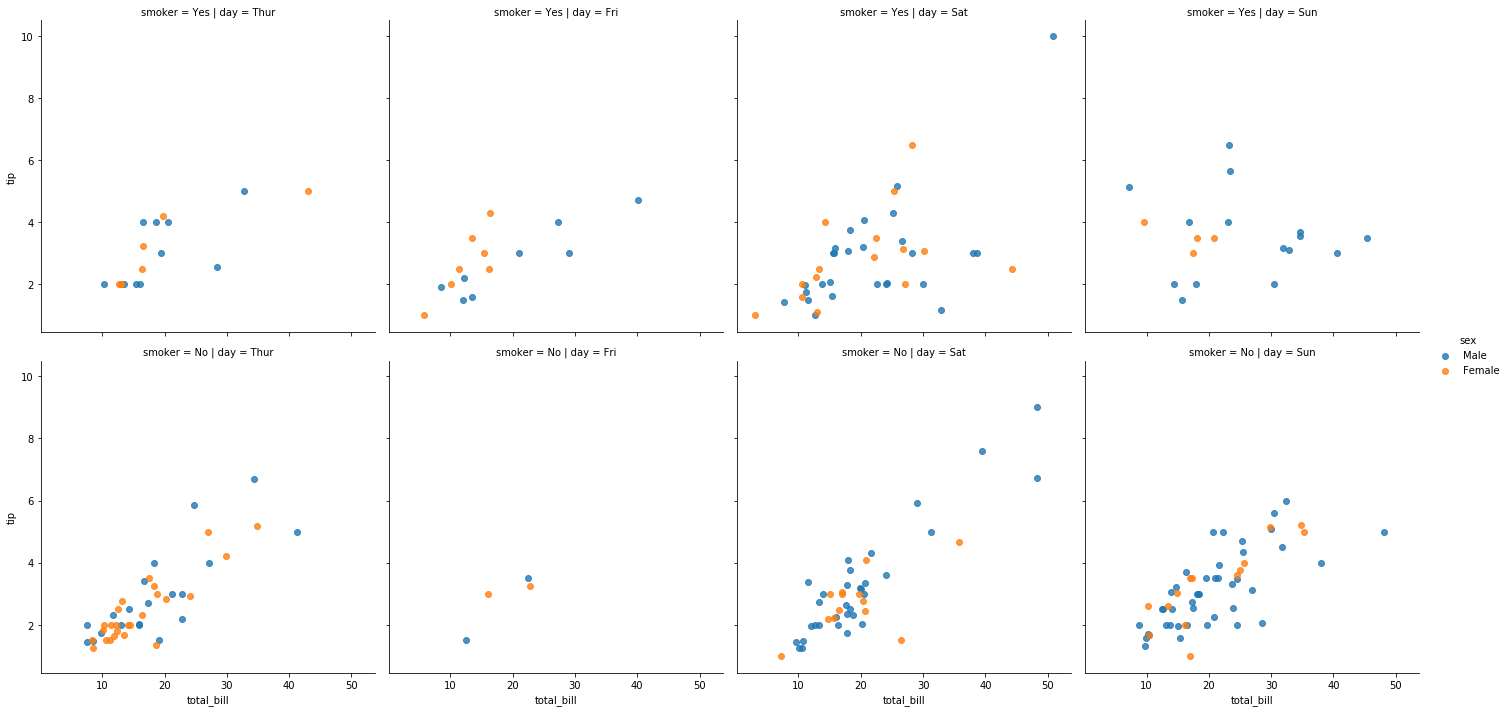

In [18]:
sns.lmplot(x='total_bill', y='tip', data=tips,
           hue='sex', col='day', row='smoker', fit_reg=False)

Text(0.5, 1.03, 'Joint Plot of Total Bill and Tip')

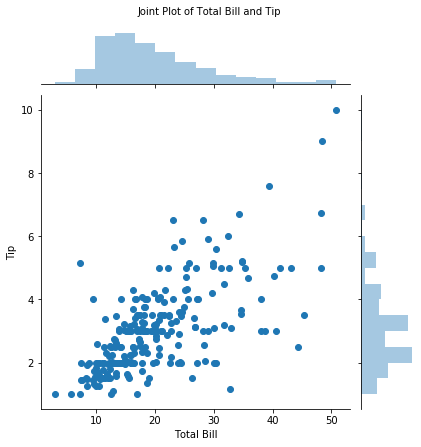

In [20]:
# scatter plot with a jointplot, which is a univariate plot on each axis.
joint = sns.jointplot(x='total_bill', y='tip', data=tips)
joint.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
joint.fig.suptitle('Joint Plot of Total Bill and Tip', fontsize=10, y=1.03)

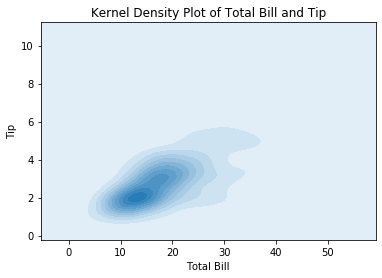

In [21]:
# 2D Density plot
kde, ax = plt.subplots()
ax = sns.kdeplot(data=tips['total_bill'],
                data2=tips['tip'],
                shade=True)
ax.set_title('Kernel Density Plot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')

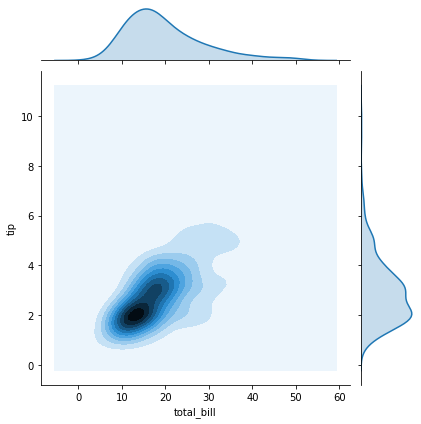

In [22]:
kde_joint = sns.jointplot(x='total_bill', y='tip',
                         data=tips, kind='kde')

Text(0.5, 1.03, 'Hexbin Joint Plot of Total Bill and Tip')

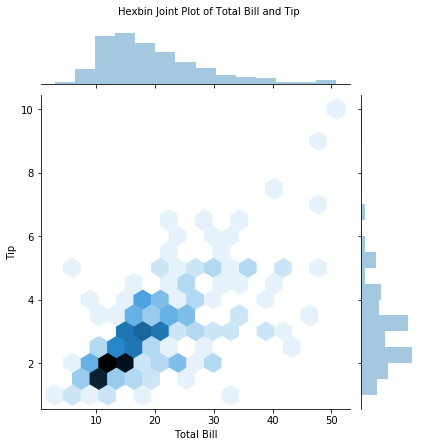

In [22]:
# hexbin plot
hexbin = sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')
hexbin.set_axis_labels(xlabel='Total Bill', ylabel='Tip')
hexbin.fig.suptitle('Hexbin Joint Plot of Total Bill and Tip',
               fontsize=10, y=1.03)

#### Pairwise Relationships

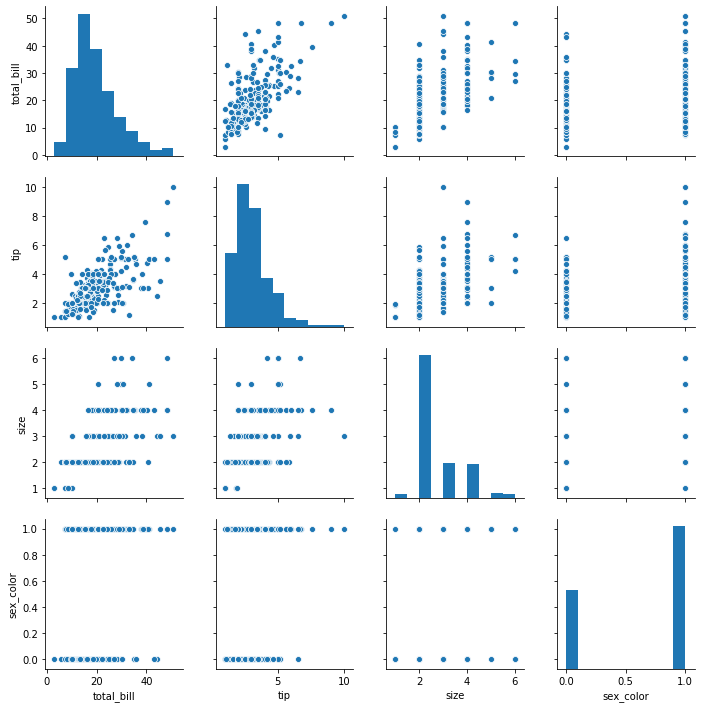

In [27]:
fig = sns.pairplot(tips)

One drawback when using `pairplot` is that there is redundant information; the top half is the same as the bottom half. We can use `pairgrid` to manually assign the plots for the top half and bottom half.

In [31]:
pair_grid = sns.PairGrid()
pair_grid = pair_grid.map_upper(sns.regplot)
pair_grid = pair_grid.map_lower(sns.kdeplot)
pair_grid = pair_grid.map_diag(sns.distplot, rug=True)

AttributeError: 'DataFrame' object has no attribute 'as_ordered'

### Multivariate Data

As there is no de facto template for plotting multivariate data, some possible ways to include more information are to use color, size and shape.

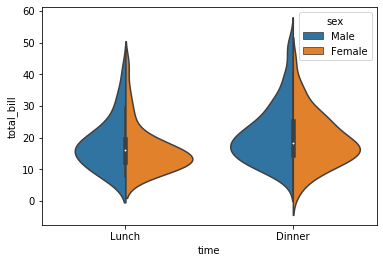

In [32]:
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips,
                   hue='sex', split=True)

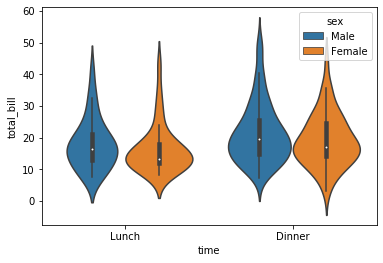

In [33]:
# without the 'split' parameter
violin, ax = plt.subplots()
ax = sns.violinplot(x='time', y='total_bill', data=tips, hue='sex')

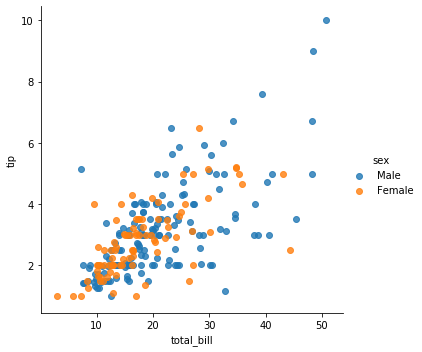

In [34]:
scatter = sns.lmplot(x='total_bill', y='tip', data=tips, hue='sex', fit_reg=False)

c:\users\ugdk93\venv\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
c:\users\ugdk93\venv\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


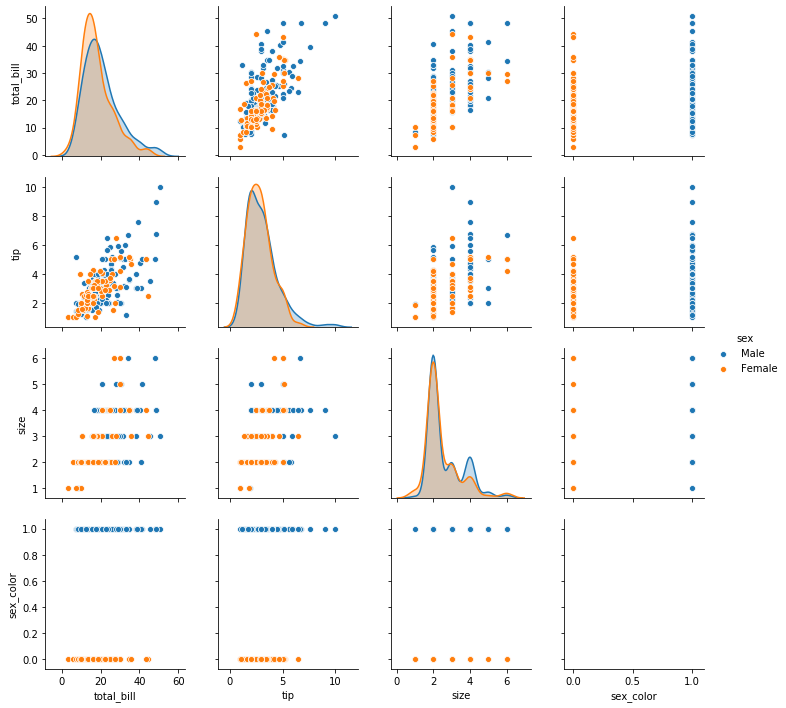

In [35]:
# Passing a categorical variable for the 'hue' parameter.
fig = sns.pairplot(tips, hue='sex')

***************************
### Plotting Pandas Objects

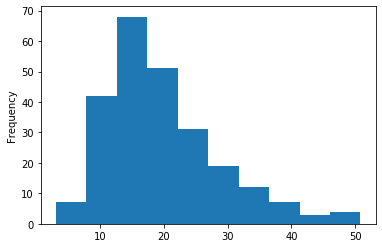

In [36]:
# Histograms
# On a series...
fig, ax = plt.subplots()
ax = tips['total_bill'].plot.hist()

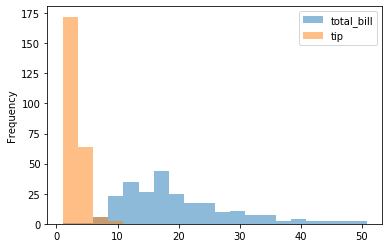

In [37]:
# On a data frame...
# Set an alpha channel transparency so we can see through the overlapping bars
fig, ax = plt.subplots()
ax = tips[['total_bill', 'tip']].plot.hist(alpha=0.5, bins=20, ax=ax)

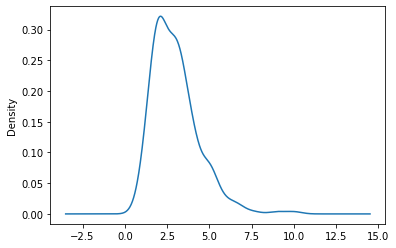

In [38]:
# Density plot
fig, ax = plt.subplots()
ax = tips['tip'].plot.kde()

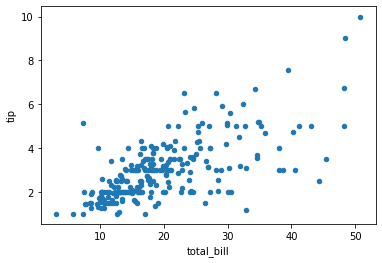

In [40]:
# Scatterplot
fig, ax = plt.subplots()
ax = tips.plot.scatter(x='total_bill', y='tip', ax=ax)

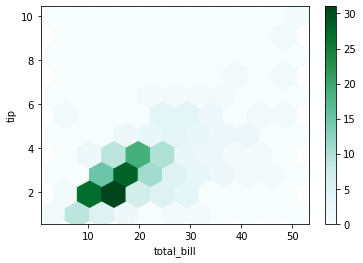

In [42]:
# Hexbin
fig, ax = plt.subplots()
ax = tips.plot.hexbin(x='total_bill', y='tip', gridsize=10, ax=ax)

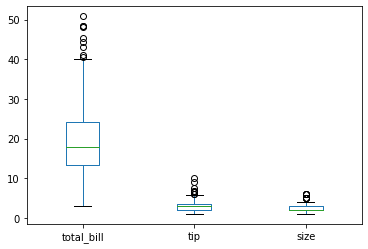

In [43]:
fig, ax = plt.subplots()
ax = tips.plot.box(ax=ax)

#### Seaborn Themes and Styles

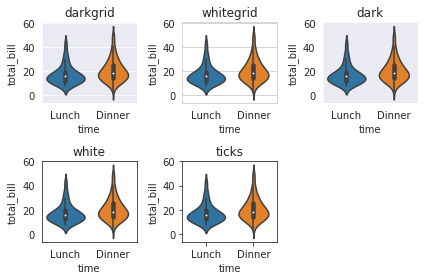

In [44]:
fig = plt.figure()
seaborn_styles = ['darkgrid', 'whitegrid', 'dark', 'white', 'ticks']
for idx, style in enumerate(seaborn_styles):
    plot_position = idx + 1
    with sns.axes_style(style):
        ax = fig.add_subplot(2, 3, plot_position)
        violin = sns.violinplot(x='time', y='total_bill', data=tips, ax=ax)
        violin.set_title(style)
fig.tight_layout()    